In [6]:
!nvidia-smi

Tue Jun  4 21:06:41 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    15W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [7]:
!pip install imgaug

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from imgaug import parameters as iap
from imgaug import augmenters as iaa
import random
from sklearn.model_selection import train_test_split

In [0]:
X = np.load('X.npy')
y = np.load('y.npy')

In [20]:
print(X.shape, y.shape)

(4704, 60, 80, 3) (4704,)


In [21]:
!ls -lh

total 65M
drwxr-xr-x 1 root root 4.0K May 31 16:17 sample_data
-rw-r--r-- 1 root root  65M Jun  4 22:04 X.npy
-rw-r--r-- 1 root root  37K Jun  4 20:41 y.npy


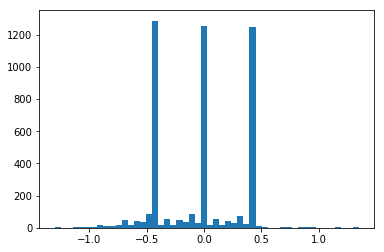

In [22]:
plt.hist(y, 50);

In [0]:
def augment(img, str_angle):
  # flip 
  if random.random() > 0.5:
    img = img[:, ::-1, :]
    str_angle = -str_angle
  # blur
  blurer = iaa.GaussianBlur(iap.Uniform(0.1, 1.0))
  img = blurer.augment_image(img)
  # shuffle
  sh = iaa.ChannelShuffle(p=0.5)
  img = sh.augment_image(img)
  # fog
  snow = iaa.Fog()
  img = snow.augment_image(img)
  # translate
  tx = random.randint(-20, 20)
  translater = iaa.Affine(translate_px={"x":tx}, mode="edge")
  img = translater.augment_image(img)
  str_angle += tx*0.025
  return img, str_angle

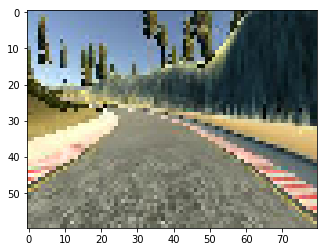

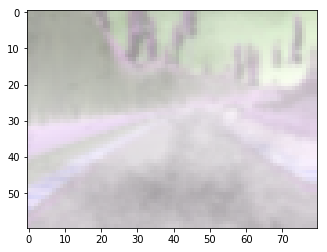

0.0 -0.025


In [26]:
test_id = 22
test_img = X[test_id]
test_sa = y[test_id]
aug_img, aug_sa = augment(test_img, test_sa)
plt.imshow(test_img)
plt.show()
plt.imshow(aug_img)
plt.show()
print(test_sa, aug_sa)

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1337)

In [29]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(3763, 60, 80, 3) (3763,)
(941, 60, 80, 3) (941,)


In [0]:
Xy_gen = [augment(img, sa) for (img, sa) in zip(X_train, y_train)]

In [0]:
X_gen, y_gen = map(np.array, zip(*Xy_gen))

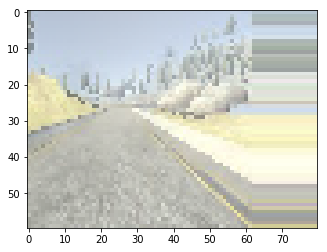

In [34]:
plt.imshow(X_gen[0])

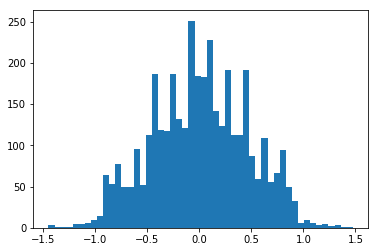

In [35]:
plt.hist(y_gen, 50);